# WEBSCRAPPING USING TRACKER.GG

### BackGround:What is valorant?

#### VALORANT is a 5v5 character-based tactical FPS(First Person Shooter)developped by riot games. The game has 14 million active monthly users, and 5 million active users in north america. In this project, I webscrapped and pull data from tracker.gg to create models for analysis. (I will be using the riot developper API as well but unfortunately got timed out since I had too many requests) 

##### You can find out more at https://playvalorant.com/en-us/

### I will be using the chrome inspector (control+shift+c) in order to webscrap data from the website Tracker.gg

In [97]:
from IPython.display import Image         #function to display the image 
Image(url="https://learn.circuit.rocks/wp-content/uploads/2020/09/Web-Scraping-using-Python-Featured-1-e1601980783290-750x393.png") #display the image with the png file found using chrome inspector, learned from https://github.com/ipython/ipython/issues/10045

#### Lets Begin!

# Setup/early stages of my code: 

In [1]:
# First I Import all the necessary libraries 
import requests              
import numpy as np
import pandas as pd
import pprint
from bs4 import BeautifulSoup

In [2]:
#then I define the URL as tracker_url and with a get request, parse the whole HTML page with beautiful soup
tracker_url = 'https://tracker.gg/valorant/leaderboards/ranked/all/default?page=1&act=4cb622e1-4244-6da3-7276-8daaf1c01be2'
tracker_response = requests.get(tracker_url)      # Use requests to retrieve data from a given URL
tracker_soup = BeautifulSoup(tracker_response.text, 'lxml')     # Parse the whole page using BeautifulSoup, conver it into lxml so it is readable
tracker_soup.title.string                                        #get it without the HTML tags to check the titles 

'North America Competitive Ranked Rating for Episode 3 - Act 2 Leaderboard - Valorant Tracker'

##### Now I find the corresponding elements within the chrome inspector  

In [4]:
players=tracker_soup.find_all('span', {'class': 'trn-ign__username'})  #to make sure that everything is correct, I test out the player name first 
ratings=tracker_soup.find_all('td', {'class': 'stat highlight'})         #to double check to see if I got everything correct 
wins=tracker_soup.find_all('td', {'class': 'stat.collapse'})
tracker_table= pd.DataFrame(players)                                    #show the dataframe for the players 
tracker_table                                                           #everything looks good so far      

,0
0,TSM FTX WARDELL
1,SoaR Cryo
2,TSM FTX bang
3,SoaR zander
4,100T Asuna
...,...
95,XSET AYRIN
96,Crit
97,tarik
98,NV Marved


##### tidying up my code, getting rid of unwanted text and /n

In [6]:
rating=tracker_soup.find('td', {'class': 'stat highlight'})                #check to see if the rating line is clean and concise   
rating

<td class="stat highlight" data-v-0e94bbe2="" data-v-25cf5790=""><img class="player-rank" data-v-0e94bbe2="" data-v-25cf5790="" src="https://trackercdn.com/cdn/tracker.gg/valorant/icons/tiers/24.png"/>
                1,257
              </td>

In [7]:
wins=tracker_soup.find_all('td', {'class': 'stat collapse'})                #check to see if the number of wins is clean or I need to make some edits.
wins[1]                                                    #I only set it to one to shorten the list but I see that it is a long list and realize that I have to clean the data up a bit

<td class="stat collapse" data-v-0e94bbe2="" data-v-25cf5790="">
                  128
                </td>

In [8]:
wins_string = wins[1].get_text()                  #define the wins_string by setting the index to 1 and getting the 
wins_string                                       #print it out 

'\n                  128\n                '

In [9]:
wins=(''.join(wins_string.split()))                 #to get rid of the two placeholders, command joinsplit
(''.join(wins_string.split()))                      #show the result and it is now clean 

'128'

### Problem I encountered:

In [10]:
rankedrating = tracker_soup.select('td.stat.highlight')                               
rating = tracker_soup.select('img.player-rank')  
place=tracker_soup.select('td.rank')
players=tracker_soup.select('span.trn-ign__username')
wins=tracker_soup.select('td.stat.collapse')
links = [a.attrs.get('href') for a in tracker_soup.select('td.username a')]
tracker =[]                                                                             #set trakcer as an empty list          
for i in range(len(players)):                                                           #for all i iin range lens players,
    rankedrating_string = rankedrating[i].get_text()                                    #get the information 
    rankedratings=(''.join(rankedrating_string.split()))                                #command used to join the space and get rid of the /n like above 
    place_string=place[i]                                                               #define the place string as place[index] 
    wins=(''.join(wins_string.split()))                                                 #this is where the problem occurs
    data = {"players": players[i],                                                      #I cannot put i after wins in the data as it would result in an index error  
            "rankedratings": rankedratings,                                             #I finally figured it why after toying with it for 2 hours 
            "wins":wins,                                                                #if i put i there, since there are many wins on the website, but I defined i as len(players)          
            "place":place[i],                                                           #it would result in an error since the for loop states for i in range 
            "rating": rating[i],                                                        #but wins i would be greater and not in range resulting in the error 
            "link": links[i]}                                                           #I am glad that I have experienced that error first hand
    tracker.append(data)                                                                #I feel like I learned alot from it, thats why I left this in so hopefully I don't forget the journey I went through and the solution in the future.     
tracker = pd.DataFrame(tracker)                        
tracker

,players,rankedratings,wins,place,rating,link
0,[TSM FTX WARDELL],"1,257",128,"[[[<path d=""M4.868 13.333H15.13l4.444-8.889h-5...",[],/valorant/profile/riot/TSM%20FTX%20WARDELL%238266
1,[SoaR Cryo],"1,242",128,"[[[<path d=""M4.868 13.333H15.13l4.444-8.889h-5...",[],/valorant/profile/riot/SoaR%20Cryo%23Sadge
2,[TSM FTX bang],"1,183",128,"[[[<path d=""M4.868 13.333H15.13l4.444-8.889h-5...",[],/valorant/profile/riot/TSM%20FTX%20bang%230000
3,[SoaR zander],"1,124",128,[[4]],[],/valorant/profile/riot/SoaR%20zander%23swagy
4,[100T Asuna],"1,120",128,[[5]],[],/valorant/profile/riot/100T%20Asuna%231111
...,...,...,...,...,...,...
95,[XSET AYRIN],788,128,[[99]],[],/valorant/profile/riot/laski%239011
96,[Crit],788,128,[[100]],[],/valorant/profile/riot/Young%20Thug%23kenza
97,[tarik],788,128,[[101]],[],/valorant/profile/riot/Troll%23Van
98,[NV Marved],787,128,[[102]],[],/valorant/profile/riot/12pk%23XANAX


### The solution to the problem above: 
I selected the wrong data. Select the element containing just my data, which is in the format of a table. And instead of making separate list of all the column values in regards to rank, players, ratings etc, and combining them into rows, I just had to reiterate the items representing each data row on the table. Which in this website is the <tr> element and on each row, I just had to build the data dictionary from the specific cells td. And finally, in order to get rid of the header row, I just have to select tbody as my element. Learned from https://stackoverflow.com/questions/20522820/how-to-get-tbody-from-table-from-python-beautiful-soup  https://datascience.stackexchange.com/questions/10857/how-to-scrape-a-table-from-a-webpage and https://python-forum.io/thread-27991.html

# Attempt number 2, using table and for loop 

### Now I add everything together into a for loop

In [11]:
table = tracker_soup.find('table', {'class': 'trn-table'})            #Using the chrome inspector, I found that table.trntable contains all the informations I need. 
players = []                                                          #define table as that by using the find function and setting the term players as an empty list
for row in table.find('tbody').find_all('tr'):                        #Setting a for loop, for each row in table, find the tbody which contains all the data I need and find all element tr
    rank, player, ignore, rating, tier, wins = row.find_all('td')     #the elements are rank, player, I put ignore here since it is a place where you can see the img of the radiant rank and it is the same image 
    wins_string = wins.get_text()                                     #like I did before, I set the parameters so that I can get rid of the annoying /n 
    wins=(''.join(wins_string.split()))                               #Using the join command to join everything together 
    rating_string=rating.get_text()                                   #same as the one for wins above
    rating=(''.join(rating_string.split()))                           #join them together 
    rating=rating.replace(',', '')                                    #replace the commas so that it shows up as 1234 instead of 1,234 taken from https://stackoverflow.com/questions/16233593/how-to-strip-comma-in-python-string
    rank_string=rank.get_text()                                       #because there is ornaments for rank 1 to 3, when transfering the data, I got extra N/ for only rank 1 to 3 so I ran the code for the whole ranks as well to get rid of the first 3
    rank=(''.join(rank_string.split()))                               #same as above, join them together
    data = {"player": player.find('span', {'class': 'trn-ign__username'}).get_text(),  #organize the data, the columns, as player, rank, wins, rating, link 
            "rank": rank,                                                              #I define the find command here specifically because there are two classess one is trn-ign and the other is trn-ign username, defining trn-ign username  
            "wins": wins,                                                              #is the more concise one the other shows unique numbers players put at the end of their usernames
            "rating": rating,
            "link": player.find('a')['href']}                         #the last column I use to get the hyperlink that is inside the table that links to all the player's individual profiles 
    players.append(data)                                              #Add up all the data together with players and define it as a dataframe, df
    df = pd.DataFrame(players)                                 
df                                                                    #show the data

,player,rank,wins,rating,link
0,TSM FTX WARDELL,1,128,1257,/valorant/profile/riot/TSM%20FTX%20WARDELL%238266
1,SoaR Cryo,2,139,1242,/valorant/profile/riot/SoaR%20Cryo%23Sadge
2,TSM FTX bang,3,150,1183,/valorant/profile/riot/TSM%20FTX%20bang%230000
3,SoaR zander,4,133,1124,/valorant/profile/riot/SoaR%20zander%23swagy
4,100T Asuna,5,111,1120,/valorant/profile/riot/100T%20Asuna%231111
...,...,...,...,...,...
95,XSET AYRIN,99,80,788,/valorant/profile/riot/XSET%20AYRIN%231337
96,Crit,100,151,788,/valorant/profile/riot/Crit%23me0w
97,tarik,101,266,788,/valorant/profile/riot/tarik%231337
98,NV Marved,102,78,787,/valorant/profile/riot/NV%20Marved%23ICE


### Tidying up the code in attempt number 2:

#### In order to have a "cleaner" code, I add .strip() at the end of each variable in data to get rid of the /n. The result is the same but the codes are cleaner. I discovered only after searching the internet and looking at the forum: https://stackoverflow.com/questions/39870290/how-to-strip-line-breaks-from-beautifulsoup-get-text-method

In [12]:
table = tracker_soup.find('table', {'class': 'trn-table'})                           #define table as that by using the find function
players = []                                                                         #setting the term players as an empty list
for row in table.find('tbody').find_all('tr'):                                       #same as above, with chrome inspector find all the elements 
    rank, player, ignore, rating, tier, wins = row.find_all('td')
    data = {"player": player.find('span', {'class': 'trn-ign__username'}).get_text(), #set the columns for my datasets, same as above 
            "rank": rank.get_text().strip(),                                          #instead now, I add .strip() to get rid of the annoying /n taken from the link above
            "wins": wins.get_text().strip(), 
            "rating": rating.get_text().strip().replace(',', ''),                     #like above,except put. replace right after.strip 
            "link": player.find('a')['href']}
    players.append(data)                                                               #combine the data  
    df1 = pd.DataFrame(players)                                                         #define df as the dataframe of players
df1                                                                                     #show the data

,player,rank,wins,rating,link
0,TSM FTX WARDELL,1,128,1257,/valorant/profile/riot/TSM%20FTX%20WARDELL%238266
1,SoaR Cryo,2,139,1242,/valorant/profile/riot/SoaR%20Cryo%23Sadge
2,TSM FTX bang,3,150,1183,/valorant/profile/riot/TSM%20FTX%20bang%230000
3,SoaR zander,4,133,1124,/valorant/profile/riot/SoaR%20zander%23swagy
4,100T Asuna,5,111,1120,/valorant/profile/riot/100T%20Asuna%231111
...,...,...,...,...,...
95,XSET AYRIN,99,80,788,/valorant/profile/riot/XSET%20AYRIN%231337
96,Crit,100,151,788,/valorant/profile/riot/Crit%23me0w
97,tarik,101,266,788,/valorant/profile/riot/tarik%231337
98,NV Marved,102,78,787,/valorant/profile/riot/NV%20Marved%23ICE


# Last/Final attempt with for loop to scrap the player's individual stats. 

In [17]:
tracker_url = 'https://tracker.gg/valorant/leaderboards/ranked/all/default?page=1&act=4cb622e1-4244-6da3-7276-8daaf1c01be2' #define tracker url as the site where the data will be scrapped from. 
tracker_response = requests.get(tracker_url)      # Use requests to retrieve data from a given URL
tracker_soup = BeautifulSoup(tracker_response.text, 'html.parser')     # Parse the whole page using BeautifulSoup, conver it into html so it is readable
tracker_soup.title.string                                        #get it without the HTML tags to check the titles 

'North America Competitive Ranked Rating for Episode 3 - Act 2 Leaderboard - Valorant Tracker'

In [15]:
table = tracker_soup.find('table', {'class': 'trn-table'})                           #same as before,in order to scrape the leaderboard data, use chrome inspector, find the table and define table that contains all the elements 
players = []   #create an empty list for players 
i = 1         #set i=1 so that the variable in the for loop assumes 1 in the first position. https://realpython.com/python-for-loop/ under numberical range loop
for row in table.find('tbody').find_all('tr'):                                       #same as above, with chrome inspector find all the elements 
    rank, player, ignore, rating, tier, wins = row.find_all('td')              #according to the table from chrom inspector, list the elements for the findall function
    data = {"player": player.find('span', {'class': 'trn-ign__username'}).get_text(), #set the columns for my datasets, same as above 
            "rank": rank.get_text().strip(),                                          #instead now, I add .strip() to get rid of the annoying /n taken from the link above
            "wins": wins.get_text().strip(), 
            "rating": rating.get_text().strip().replace(',', ''),                     #like above,except put. replace right after.strip 
            "link": player.find('a')['href']}
    players.append(data)
    df1 = pd.DataFrame(players)                                                               #combine the data                                                     

In [16]:
links = df1["link"].tolist()                       #convert the panda dataframe to a list. taken from https://www.dataindependent.com/pandas/dataframe-to-list/in order to run the for loop to scrap all the links, first we have to change up the links so that it is in an http format. 
i = 1             #define our index variable as 1. 
players_stats = []       #create an empty set for players_stats that we will be scrapping 
for link in links:       #start of the forloop, for link(the one that we scrapped above) in the links(the list that we obtained from using the convert to list function in panada)
    player_url = "https://tracker.gg" + link  #define player_url as the new player url with the string tracker.gg infront so that we can directly go to the link in the forloop as the links before started with /
    response = requests.get(player_url)      # Use requests to retrieve data from a given URL taken 
    p_data = response.text                   #define a new variable p_data or player_data as the fucntion response.text which converts the html into text format to see the elements better(notshown here)
    soup = BeautifulSoup(p_data,'html.parser') #define soup using the function to parse the whole page using BeautifulSoup, conver it into html so it is readable
    stats = soup.find('div',{"class":"giant-stats"}) #define the new variable stats with the function to find all the elements within chorme inspector under div giant stats on webpage https://tracker.gg/valorant/profile/riot/TSM%20FTX%20WARDELL%238266/overview since all the pages are the same
    try:                                             #since I encountered some errors while using octoparse, I decided to use the try except argument in python just in case if the data scrap encounters some error. 
        stats = {                                    #set the columns for my datasets stats, same as above, with column urls, the completed links+the strings I made, adr, kd ratio, headshot% and win% as the new columns  
        "urls" : player_url,                         #define the column url as the newly created player_url from above
        "damaged/rounds" : stats.find_all('span',{"class":"value"})[0].text.strip(), #same as before, find all the element that corresponds to the adr bubble in chrome inspector. Use text.strip to get rid of the annoying /n since all of the stats have the same element, use index. Learn from https://stackoverflow.com/questions/63821756/how-to-access-the-second-element-that-has-the-same-class-name-with-python
        "killToDeath ratio" : stats.find_all('span',{"class":"value"})[1].text.strip(), #since they are all under the same title, use [] function to order them from left to right. Here kd is the second so i set [] to 1 find the kd ratio under the second tab of the span class value. 
        "headshot %" : stats.find_all('span',{"class":"value"})[2].text.strip(), #same as before, find all the elements that corresponds to the headshot% 
        "win %" : stats.find_all('span',{"class":"value"})[3].text.strip()} #same for winrate. 
    except:  #exception to the for loop above in case of errors 
        stats = {         
        "urls" : "Not available",
        "damaged/rounds" : "Not available",
        "killToDeath ratio" : "Not available",
        "headshot %" : "Not available",
        "win %" : "Not available",}                    #set all the column as a string of "not available" if there was an error in the forloop. For more information: https://www.pythontutorial.net/python-basics/python-try-except/
    players_stats.append(stats)                        #append the stats table that we created with the previously defined empty function of playerstats.
    stats_df = pd.DataFrame(players_stats)             #define the stats_df as the new two-dimensional heterogeneous tabular data.
df1["Urls"] = stats_df["urls"].tolist()                #set the title for the column of the links that we combined above as a list
df1["Damaged/rounds"] = stats_df["damaged/rounds"].tolist() #set the title of the adr that we scrapped above as a list also 
df1["killToDeath ratio"] = stats_df["killToDeath ratio"].tolist() #set the title of the kd ratio we scrapped above as a list
df1["headshot %"] = stats_df["headshot %"].tolist() #set the title of the headshot percentage we scrapped above as a list
df1["win %"] = stats_df["win %"].tolist() #set the title of the win percent we scrapped above as a list
df1 #show the new dataframe

,player,rank,wins,rating,link,Urls,Damaged/rounds,killToDeath ratio,headshot %,win %
0,TSM FTX WARDELL,1,128,1257,/valorant/profile/riot/TSM%20FTX%20WARDELL%238266,https://tracker.gg/valorant/profile/riot/TSM%2...,171.2,1.44,23.4%,57.4%
1,SoaR Cryo,2,139,1242,/valorant/profile/riot/SoaR%20Cryo%23Sadge,https://tracker.gg/valorant/profile/riot/SoaR%...,172.4,1.32,28.8%,65.5%
2,TSM FTX bang,3,150,1183,/valorant/profile/riot/TSM%20FTX%20bang%230000,https://tracker.gg/valorant/profile/riot/TSM%2...,156.5,1.17,39.1%,53.7%
3,SoaR zander,4,133,1124,/valorant/profile/riot/SoaR%20zander%23swagy,https://tracker.gg/valorant/profile/riot/SoaR%...,151.1,1.24,28.2%,67.1%
4,100T Asuna,5,111,1120,/valorant/profile/riot/100T%20Asuna%231111,https://tracker.gg/valorant/profile/riot/100T%...,167.3,1.19,26.3%,57.9%
...,...,...,...,...,...,...,...,...,...,...
95,XSET AYRIN,99,80,788,/valorant/profile/riot/XSET%20AYRIN%231337,https://tracker.gg/valorant/profile/riot/XSET%...,145.3,1.09,20.6%,56.6%
96,Crit,100,151,788,/valorant/profile/riot/Crit%23me0w,https://tracker.gg/valorant/profile/riot/Crit%...,148.9,1.06,30.2%,46.0%
97,tarik,101,266,788,/valorant/profile/riot/tarik%231337,https://tracker.gg/valorant/profile/riot/tarik...,166.2,1.34,21.4%,55.7%
98,NV Marved,102,78,787,/valorant/profile/riot/NV%20Marved%23ICE,https://tracker.gg/valorant/profile/riot/NV%20...,149.6,1.01,30.3%,40.9%


### Time to gather even more data by collecting data on the second page

In [18]:
tracker_url = 'https://tracker.gg/valorant/leaderboards/ranked/all/default?page=2&act=4cb622e1-4244-6da3-7276-8daaf1c01be2'       #second page, different url same function
tracker_response = requests.get(tracker_url)      # Use requests to retrieve data from a given URL
tracker_soup = BeautifulSoup(tracker_response.text, 'html.parser')     # Parse the whole page using BeautifulSoup, conver it into lxml so it is readable

In [19]:
table = tracker_soup.find('table', {'class': 'trn-table'})                           #define table as that by using the find function
players = []                                                                         #setting the term players as an empty list
i = 1
for row in table.find('tbody').find_all('tr'):                                       #same as above, with chrome inspector find all the elements 
    rank, player, ignore, rating, tier, wins = row.find_all('td')
    data = {"player": player.find('span', {'class': 'trn-ign__username'}).get_text(), #set the columns for my datasets, same as above 
            "rank": rank.get_text().strip(),                                          #instead now, I add .strip() to get rid of the annoying /n taken from the link above
            "wins": wins.get_text().strip(), 
            "rating": rating.get_text().strip().replace(',', ''),                     #like above,except put. replace right after.strip 
            "link": player.find('a')['href']}
    players.append(data)                                                               #combine the data  
    df2 = pd.DataFrame(players)                                                         #define df as the dataframe of players

In [20]:
links = df2["link"].tolist()  #convert the panda dataframe to a list. taken from https://www.dataindependent.com/pandas/dataframe-to-list/in order to run the for loop to scrap all the links, first we have to change up the links so that it is in an http format.
i = 1                      #rest are exactly the same as above
players_stats = []
for link in links:
    player_url = "https://tracker.gg" + link
    response = requests.get(player_url)
    p_data = response.text
    soup = BeautifulSoup(p_data,'html.parser')
    stats = soup.find('div',{"class":"giant-stats"})
    try:
        stats = { #set the columns for my datasets stats, same as above, with column urls, the completed links+the strings I made, adr, kd ratio, headshot% and win% as the new columns  
        "urls" : player_url,
        "damaged/rounds" : stats.find_all('span',{"class":"value"})[0].text.strip(),
        "killToDeath ratio" : stats.find_all('span',{"class":"value"})[1].text.strip(),
        "headshot %" : stats.find_all('span',{"class":"value"})[2].text.strip(),
        "win %" : stats.find_all('span',{"class":"value"})[3].text.strip()}
    except: #define the exceptions to the for loop above in case of errors 
        stats = {  
        "urls" : "Not available", #if the for loop runs into an exception, it was display the string not available for each of the columns
        "damaged/rounds" : "Not available",
        "killToDeath ratio" : "Not available",
        "headshot %" : "Not available",
        "win %" : "Not available",}             #set all the column as a string of "not available" if there was an error in the forloop. For more information: https://www.pythontutorial.net/python-basics/python-try-except/
    players_stats.append(stats)            #append the stats table that we created with the previously defined empty function of playerstats.
    stats_df = pd.DataFrame(players_stats)  #define the stats_df as the new two-dimensional heterogeneous tabular data.
 
df2["Urls"] = stats_df["urls"].tolist() #set the title for the column of the links that we combined above as a list
df2["Damaged/rounds"] = stats_df["damaged/rounds"].tolist() #set the title of the adr that we scrapped above as a list also 
df2["killToDeath ratio"] = stats_df["killToDeath ratio"].tolist() #set the title of the kd ratio we scrapped above as a list
df2["headshot %"] = stats_df["headshot %"].tolist() #set the title of the headshot percentage we scrapped above as a list
df2["win %"] = stats_df["win %"].tolist() #set the title of the win percent we scrapped above as a list

df2    #show the new data for page 2, titled df2

,player,rank,wins,rating,link,Urls,Damaged/rounds,killToDeath ratio,headshot %,win %
0,GUARD neT,104,158,786,/valorant/profile/riot/GUARD%20neT%23zero,https://tracker.gg/valorant/profile/riot/GUARD...,146.9,1.08,32.4%,57.1%
1,hamburgernochees,105,110,782,/valorant/profile/riot/hamburgernochees%23king,https://tracker.gg/valorant/profile/riot/hambu...,140.2,1.00,25.7%,40.7%
2,IMT Rossy x1,106,111,781,/valorant/profile/riot/IMT%20Rossy%20x1%23Sav,https://tracker.gg/valorant/profile/riot/IMT%2...,144.2,1.07,31.3%,46.9%
3,LG moose,107,85,779,/valorant/profile/riot/LG%20moose%23E30,https://tracker.gg/valorant/profile/riot/LG%20...,144.4,1.11,25.8%,51.7%
4,EccentriK,108,70,779,/valorant/profile/riot/EccentriK%239658,https://tracker.gg/valorant/profile/riot/Eccen...,0.0,1.63,0.0%,44.1%
...,...,...,...,...,...,...,...,...,...,...
95,RoguePringle,204,87,685,/valorant/profile/riot/RoguePringle%23NA1,https://tracker.gg/valorant/profile/riot/Rogue...,152.4,1.08,24.3%,50.3%
96,jstigma,205,103,684,/valorant/profile/riot/jstigma%23cls,https://tracker.gg/valorant/profile/riot/jstig...,0.0,1.78,0.0%,58.1%
97,napkin,206,91,684,/valorant/profile/riot/napkin%23LFT,https://tracker.gg/valorant/profile/riot/napki...,132.0,0.99,29.2%,47.7%
98,jammyz,207,42,682,/valorant/profile/riot/jammyz%23NCSM,https://tracker.gg/valorant/profile/riot/jammy...,143.3,1.08,23.6%,48.2%


### Gathering data from the third page

In [21]:
tracker_url = 'https://tracker.gg/valorant/leaderboards/ranked/all/default?page=3&act=4cb622e1-4244-6da3-7276-8daaf1c01be2'      #now the third page, different url same function
tracker_response = requests.get(tracker_url)      # Use requests to retrieve data from a given URL
tracker_soup = BeautifulSoup(tracker_response.text, 'html.parser')     # Parse the whole page using BeautifulSoup, conver it into lxml so it is readable

In [22]:
table = tracker_soup.find('table', {'class': 'trn-table'})                           #define table as that by using the find function
players = []                                                                         #setting the term players as an empty list
for row in table.find('tbody').find_all('tr'):                                       #same as above, with chrome inspector find all the elements 
    rank, player, ignore, rating, tier, wins = row.find_all('td')
    data = {"player": player.find('span', {'class': 'trn-ign__username'}).get_text(), #set the columns for my datasets, same as above 
            "rank": rank.get_text().strip(),                                          #instead now, I add .strip() to get rid of the annoying /n taken from the link above
            "wins": wins.get_text().strip(), 
            "rating": rating.get_text().strip().replace(',', ''),                     #like above,except put. replace right after.strip 
            "link": player.find('a')['href']}
    players.append(data)                                                               #combine the data  
    df3 = pd.DataFrame(players)                                                         #define df as the dataframe of players

In [23]:
links = df3["link"].tolist()          #all codes are the same as the previous two pages, except here it is made for page 3 of the leaderboard.
i = 1
players_stats = []
for link in links: #start of the for loop to first build the complete link and then go into each of the link to scrape data
    player_url = "https://tracker.gg" + link #same as above, to scrap the site we need to add the string infront of the links we scrapped
    response = requests.get(player_url)
    p_data = response.text
    soup = BeautifulSoup(p_data,'html.parser')
    stats = soup.find('div',{"class":"giant-stats"}) #select the corresponding elements in chrome inspect
    try:  #start of the try except clause, exact same as above
        stats = { #define the new columns of the dataset as url, damage, kd ratio, headshot% win%
        "urls" : player_url,
        "damaged/rounds" : stats.find_all('span',{"class":"value"})[0].text.strip(),
        "killToDeath ratio" : stats.find_all('span',{"class":"value"})[1].text.strip(),
        "headshot %" : stats.find_all('span',{"class":"value"})[2].text.strip(),
        "win %" : stats.find_all('span',{"class":"value"})[3].text.strip()}
    except:  #set all the column as a string of "not available" if there was an error in the forloop. For more information: https://www.pythontutorial.net/python-basics/python-try-except/
        stats = {
        "urls" : "Not available",
        "damaged/rounds" : "Not available",
        "killToDeath ratio" : "Not available",
        "headshot %" : "Not available",
        "win %" : "Not available",}
    players_stats.append(stats)  #add the stats with the previously defined dataset of players_stats
    stats_df = pd.DataFrame(players_stats) #like above, define stats_df as the dataframe for players_stats
    
df3["Urls"] = stats_df["urls"].tolist() #like above, give the columns of the new dataset strings/names 
df3["Damaged/rounds"] = stats_df["damaged/rounds"].tolist()
df3["killToDeath ratio"] = stats_df["killToDeath ratio"].tolist()
df3["headshot %"] = stats_df["headshot %"].tolist()
df3["win %"] = stats_df["win %"].tolist()

df3  #show the final page of dataset named df3

,player,rank,wins,rating,link,Urls,Damaged/rounds,killToDeath ratio,headshot %,win %
0,sussy jakee,209,187,680,/valorant/profile/riot/sussy%20jakee%23juli,https://tracker.gg/valorant/profile/riot/sussy...,151.5,1.06,27.8%,49.1%
1,lin,210,48,679,/valorant/profile/riot/lin%23OTF,https://tracker.gg/valorant/profile/riot/lin%2...,0.0,1.61,0.0%,50.9%
2,lucasdeeznuts69,211,162,678,/valorant/profile/riot/lucasdeeznuts69%23ratio,https://tracker.gg/valorant/profile/riot/lucas...,153.8,1.04,25.4%,49.5%
3,Verno YT,212,107,676,/valorant/profile/riot/Verno%20YT%23Verno,https://tracker.gg/valorant/profile/riot/Verno...,137.0,1.08,25.6%,62.3%
4,Bandit,213,76,674,/valorant/profile/riot/Bandit%23oe7,https://tracker.gg/valorant/profile/riot/Bandi...,156.3,1.20,21.9%,54.0%
...,...,...,...,...,...,...,...,...,...,...
95,Apoth,309,57,616,/valorant/profile/riot/Apoth%23DOG,https://tracker.gg/valorant/profile/riot/Apoth...,149.2,1.13,33.5%,54.8%
96,DZ ScrewFace,310,91,616,/valorant/profile/riot/DZ%20ScrewFace%23MEOW,https://tracker.gg/valorant/profile/riot/DZ%20...,145.9,1.03,23.0%,47.1%
97,Drink Water,311,163,616,/valorant/profile/riot/Drink%20Water%235252,https://tracker.gg/valorant/profile/riot/Drink...,144.0,1.09,26.3%,51.9%
98,WiLD,312,86,615,/valorant/profile/riot/WiLD%23YAO,https://tracker.gg/valorant/profile/riot/WiLD%...,136.6,1.00,25.9%,44.4%


### Merge the data so that I can export it

In [24]:
valorantranked = [df1, df2, df3]                                 #define the data as all three dataframes 
result = pd.concat(valorantranked)                               #set result using the panda function concat to combine them into one

In [25]:
result.to_csv('ranked.csv')                                                      #Export the new dataset into my repo folder with the name "ranked.csv" function so that I can run regressions easier. 

## Creating a new variable:

In [26]:
import matplotlib.pyplot as plt                #time to import the matplotlib package that I can use to plot things and run regressions 
import pandas as pd                            #In order to create a new variable, I need to export the data since I cannot do division with strings  

In [27]:
df = pd.read_csv('ranked.csv')                  #set the new dataframe by using the command read to read the csv file we exported. 
df.drop('Unnamed: 0', axis = 1, inplace = True) #I saw that during the exporting process, the data created a column of unmaed:0, using thie code gets rid of it taken from https://stackoverflow.com/questions/43983622/remove-unnamed-columns-in-pandas-dataframe
df                                              #show the dataframe 

,player,rank,wins,rating,link,Urls,Damaged/rounds,killToDeath ratio,headshot %,win %
0,TSM FTX WARDELL,1,128,1257,/valorant/profile/riot/TSM%20FTX%20WARDELL%238266,https://tracker.gg/valorant/profile/riot/TSM%2...,171.2,1.44,23.4%,57.4%
1,SoaR Cryo,2,139,1242,/valorant/profile/riot/SoaR%20Cryo%23Sadge,https://tracker.gg/valorant/profile/riot/SoaR%...,172.4,1.32,28.8%,65.5%
2,TSM FTX bang,3,150,1183,/valorant/profile/riot/TSM%20FTX%20bang%230000,https://tracker.gg/valorant/profile/riot/TSM%2...,156.5,1.17,39.1%,53.7%
3,SoaR zander,4,133,1124,/valorant/profile/riot/SoaR%20zander%23swagy,https://tracker.gg/valorant/profile/riot/SoaR%...,151.1,1.24,28.2%,67.1%
4,100T Asuna,5,111,1120,/valorant/profile/riot/100T%20Asuna%231111,https://tracker.gg/valorant/profile/riot/100T%...,167.3,1.19,26.3%,57.9%
...,...,...,...,...,...,...,...,...,...,...
295,Apoth,309,57,616,/valorant/profile/riot/Apoth%23DOG,https://tracker.gg/valorant/profile/riot/Apoth...,149.2,1.13,33.5%,54.8%
296,DZ ScrewFace,310,91,616,/valorant/profile/riot/DZ%20ScrewFace%23MEOW,https://tracker.gg/valorant/profile/riot/DZ%20...,145.9,1.03,23.0%,47.1%
297,Drink Water,311,163,616,/valorant/profile/riot/Drink%20Water%235252,https://tracker.gg/valorant/profile/riot/Drink...,144.0,1.09,26.3%,51.9%
298,WiLD,312,86,615,/valorant/profile/riot/WiLD%23YAO,https://tracker.gg/valorant/profile/riot/WiLD%...,136.6,1.00,25.9%,44.4%


In [28]:
df['rating'] = df['rating'].astype(float)        #change the dataframe column rating into float so that there is no type conflict when dividing 
df['wins'] = df['wins'].astype(float)            #do the same thing with wins, change the dataframe column wins into a float type for division 

In [29]:
df['rating/wins'] = np.where(df['wins'] < 1, df['wins'], df['rating']/df['wins'])         #define the new variable dataframe rating/wins and set the parameter for division to create the new variable
                                                                                          #taken from https://stackoverflow.com/questions/35439613/python-pandas-dividing-column-by-another-column
df                                                                                        #show the new dataframe  

,player,rank,wins,rating,link,Urls,Damaged/rounds,killToDeath ratio,headshot %,win %,rating/wins
0,TSM FTX WARDELL,1,128.0,1257.0,/valorant/profile/riot/TSM%20FTX%20WARDELL%238266,https://tracker.gg/valorant/profile/riot/TSM%2...,171.2,1.44,23.4%,57.4%,9.820312
1,SoaR Cryo,2,139.0,1242.0,/valorant/profile/riot/SoaR%20Cryo%23Sadge,https://tracker.gg/valorant/profile/riot/SoaR%...,172.4,1.32,28.8%,65.5%,8.935252
2,TSM FTX bang,3,150.0,1183.0,/valorant/profile/riot/TSM%20FTX%20bang%230000,https://tracker.gg/valorant/profile/riot/TSM%2...,156.5,1.17,39.1%,53.7%,7.886667
3,SoaR zander,4,133.0,1124.0,/valorant/profile/riot/SoaR%20zander%23swagy,https://tracker.gg/valorant/profile/riot/SoaR%...,151.1,1.24,28.2%,67.1%,8.451128
4,100T Asuna,5,111.0,1120.0,/valorant/profile/riot/100T%20Asuna%231111,https://tracker.gg/valorant/profile/riot/100T%...,167.3,1.19,26.3%,57.9%,10.090090
...,...,...,...,...,...,...,...,...,...,...,...
295,Apoth,309,57.0,616.0,/valorant/profile/riot/Apoth%23DOG,https://tracker.gg/valorant/profile/riot/Apoth...,149.2,1.13,33.5%,54.8%,10.807018
296,DZ ScrewFace,310,91.0,616.0,/valorant/profile/riot/DZ%20ScrewFace%23MEOW,https://tracker.gg/valorant/profile/riot/DZ%20...,145.9,1.03,23.0%,47.1%,6.769231
297,Drink Water,311,163.0,616.0,/valorant/profile/riot/Drink%20Water%235252,https://tracker.gg/valorant/profile/riot/Drink...,144.0,1.09,26.3%,51.9%,3.779141
298,WiLD,312,86.0,615.0,/valorant/profile/riot/WiLD%23YAO,https://tracker.gg/valorant/profile/riot/WiLD%...,136.6,1.00,25.9%,44.4%,7.151163


## Exporting the new dataframe with the new variable as a csv file to excel

In [32]:
df.to_csv('rankednewvar.csv')         #save the file as a new csv file 

In [76]:
df = pd.read_csv('rankednewvar.csv')              #set the new dataframe by using the command read to read the csv file
df                                              #show the dataframe to make sure it looks like what we exported.

,Unnamed: 0,Unnamed: 0.1,player,rank,wins,rating,link,Urls,Damaged/rounds,killToDeath ratio,headshot %,win %,rating/wins
0,0,0,TSM FTX WARDELL,1,128,1257,/valorant/profile/riot/TSM%20FTX%20WARDELL%238266,https://tracker.gg/valorant/profile/riot/TSM%2...,171.2,1.44,0.23,0.57,9.820312
1,1,1,SoaR Cryo,2,139,1242,/valorant/profile/riot/SoaR%20Cryo%23Sadge,https://tracker.gg/valorant/profile/riot/SoaR%...,172.4,1.32,0.29,0.66,8.935252
2,2,2,TSM FTX bang,3,150,1183,/valorant/profile/riot/TSM%20FTX%20bang%230000,https://tracker.gg/valorant/profile/riot/TSM%2...,156.5,1.17,0.39,0.54,7.886667
3,3,3,SoaR zander,4,133,1124,/valorant/profile/riot/SoaR%20zander%23swagy,https://tracker.gg/valorant/profile/riot/SoaR%...,151.1,1.24,0.28,0.67,8.451128
4,4,4,100T Asuna,5,111,1120,/valorant/profile/riot/100T%20Asuna%231111,https://tracker.gg/valorant/profile/riot/100T%...,167.3,1.19,0.26,0.58,10.090090
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,295,295,Apoth,309,57,616,/valorant/profile/riot/Apoth%23DOG,https://tracker.gg/valorant/profile/riot/Apoth...,149.2,1.13,0.34,0.55,10.807018
296,296,296,DZ ScrewFace,310,91,616,/valorant/profile/riot/DZ%20ScrewFace%23MEOW,https://tracker.gg/valorant/profile/riot/DZ%20...,145.9,1.03,0.23,0.47,6.769231
297,297,297,Drink Water,311,163,616,/valorant/profile/riot/Drink%20Water%235252,https://tracker.gg/valorant/profile/riot/Drink...,144.0,1.09,0.26,0.52,3.779141
298,298,298,WiLD,312,86,615,/valorant/profile/riot/WiLD%23YAO,https://tracker.gg/valorant/profile/riot/WiLD%...,136.6,1.00,0.26,0.44,7.151163


#### Converting the percentages in excel: I opened the excel file and converted all the percentages from the win% and headshot% into decimals for easier time graphing since it is much faster and easier than using astype(float) 

# Graphs:

#### Lineplot: Rank Rating by Rank 

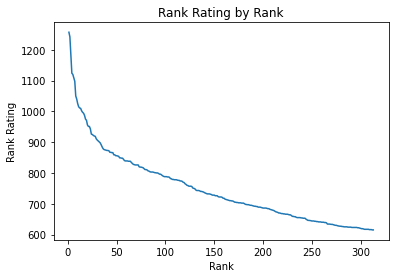

In [77]:
plt.plot(df['rank'],df['rating'])                                #set the parameters for my plot where x is the rank column and y is rating column
plt.xlabel('Rank')                                               #I used the function to add the x label rank
plt.ylabel('Rank Rating')                                         #I used the function to add the y label RankRating
plt.title("Rank Rating by Rank")                                  #use the function to add a title
plt.show()                                                        # Use the plt.show function to display my graph

#### Scatterplot: Ranked rating and total number of games won 

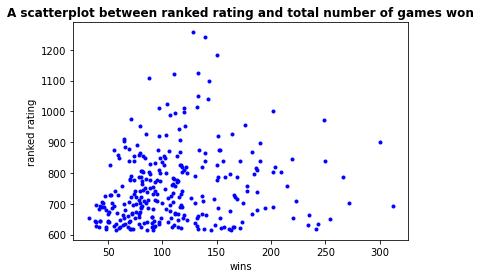

In [78]:
plt.plot('wins','rating', data=df, linestyle='none', marker='.', color = 'b')      #use the command to plot out a scatter graph where the data is taken from the data function defined above and set the color of the dots to blue.
plt.ylabel('ranked rating')                                               #print the y label as ranked rating
plt.xlabel('wins')                                          #print the x label as the amount of wins
plt.title("A scatterplot between ranked rating and total number of games won",fontweight='bold')  #print the title and make the front bold 

plt.show()        #show the scatter plot 

## Combining the two together side by side:

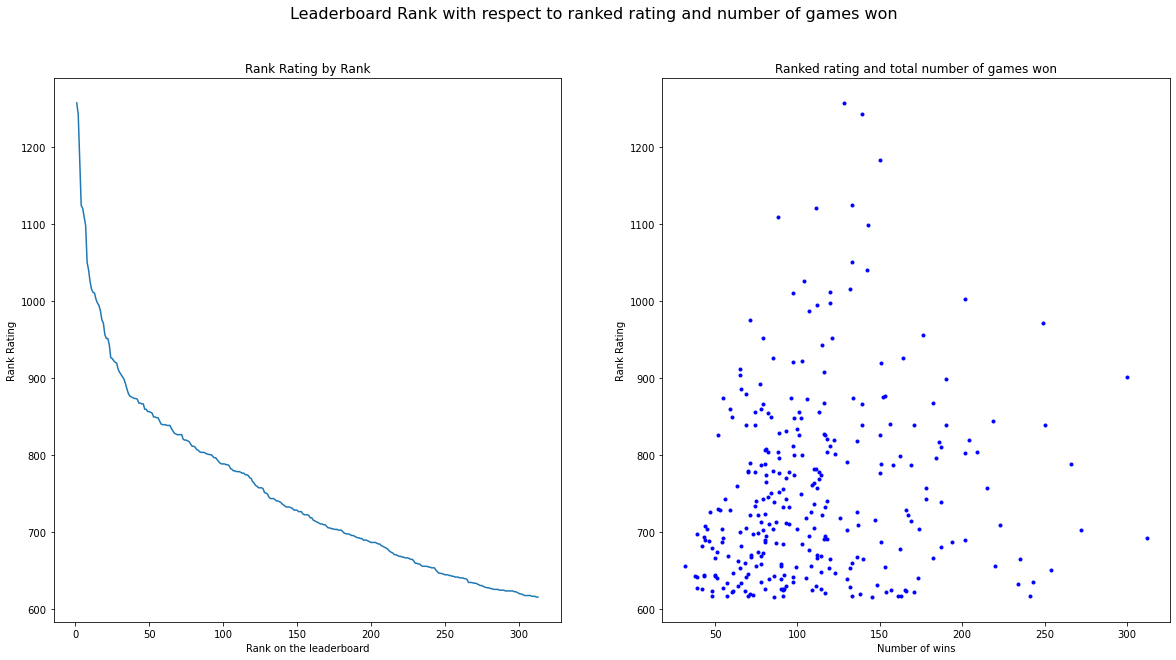

In [79]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(20,10))    #combine the fig and axis and make the figure larger by using the command figsize where first number is width and the second number is height (in inches)
ax1 = plt.subplot(1,2,1) #Define the subplot area 1 with 2 rows, 2 columns, with index 1.
ax1.plot(df['rank'],df['rating']) # assigning index 1 graph to be the line graph with the data taken from dataframe of rank and rating
ax2 = plt.subplot(1,2,2) #Define the subplot area 2 with 2 rows, 2 columns, with index 1.
ax2.plot('wins','rating', data=df, linestyle='none', marker='.', color = 'b') #assigning index 2 graph to be scatter plot created earlier with the data taken from dataframe of rank and rating
fig.suptitle('Leaderboard Rank with respect to ranked rating and number of games won', fontsize=16)  #<- here, I added the title for the figure
ax1.set_title('Rank Rating by Rank') #<- Title for subfigure 1
ax1.set_xlabel('Rank on the leaderboard')  #set the x label on ax1 as the rank on the leaderboard
ax1.set_ylabel('Rank Rating')              #set the y label on ax2 as the rank rating
ax2.set_title('Ranked rating and total number of games won') #<- Title for subfigure 2
ax2.set_xlabel('Number of wins')         #set the x label on ax2 as number of wins
ax2.set_ylabel('Rank Rating')         #set the y label on ax2 as rank rating
path ='/Users/owenl/Documents/GitHub/RL/'  #define the location of where we want to save the image in
plt.savefig(path+'ranknrating.png', dpi = 800)   #save the graph as an png with dots per inch the resolution being 500
plt.show()  

#### From the graphs I created, we can see that there exists an obvious correlation between rank on the leaderboard and total rank rating as the number 1 player on the leaderboard, Wardel, has the most amount of rank rating. Moreover, looking at the graph on the right, we can see that, though it is fairly weak, rank rating is positively correlated with number of wins. This somewhat makes sense. The more games you play, if you can maintain a good winrate, the more games you win, the higher your rank rating. What is interesting is that the number 1 player on the leaderboard, Wardel, in this case has merely 128 number of wins, a rather small amount compare to other players. To see if he and other players are more efficient at gaining rank ratings or if there exists a pattern for efficiency, I made a new graph with seaborn. Using the Rating/win we calculated above, we plot that vs rank to see if there is a correlation between how efficient players are at gaining rank ratings. 

### Graphing with seaborn  

C:\Users\owenl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


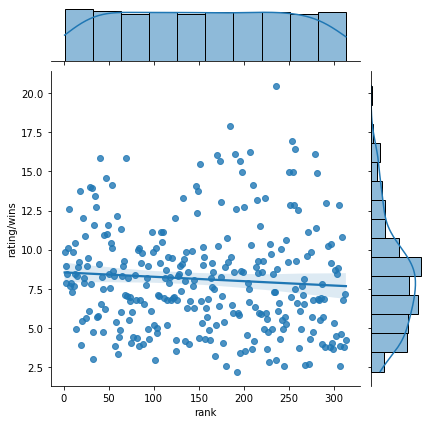

In [80]:
import seaborn as sns                                             #import seaborn as sns 
sns.jointplot('rank', 'rating/wins',data=df, kind='reg')          #use the command to make a jointplot, good for regression analysis
path ='/Users/owenl/Documents/GitHub/RL/'  #define the location of where we want to save the image in
plt.savefig(path+'seaborn.png', dpi = 800)   #save the graph as an png with dots per inch the resolution being 800

#### Though not apparent, there exists a correlation between the player rank and rating/wins. It makes sense to an extenet as if some is the rank one player, they are miles ahead of everyone else in terms of mechanics and game knowledge and it is expected that they will be more efficient at winning. Therefore, their ranked rating gained per win should reflect that and be slightly more than someone who is ranked lower.


##### Now to test my hypothesis of better players should have better individual stats with the data gathered by creating the for loop. The axis of the graph is blacked out since some of the data are unavailable and is inconsistent since the data gathered is depedent on cloudflare timing you out or not. But cleaner data can be obtained straight from accessing the tracker.gg API but creating an account

###  Graphs with respect to individual stats and ranked rating(for reference/analysis): since they are all more or less the same I did not put them side by side as they would display similar data and trend.

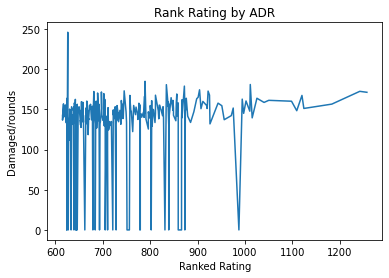

In [95]:
plt.plot(df['rating'],df['Damaged/rounds'])                                #set the parameters for my plot where x is the ranked rating column and y is average damager per round
plt.xlabel('Ranked Rating')                                               #I used the function to add the x label ranked rating
plt.ylabel('Damaged/rounds')                                         #I used the function to add the y label adr
plt.title("Rank Rating by ADR")                                  #use the function to add a title 
path ='/Users/owenl/Documents/GitHub/RL/'  #define the location of where we want to save the image in
plt.savefig(path+'rankratingbyadr.png', dpi = 800)   #save the graph as an png with dots per inch the resolution being 800
plt.show()                                                        # Use the plt.show function to display my graph

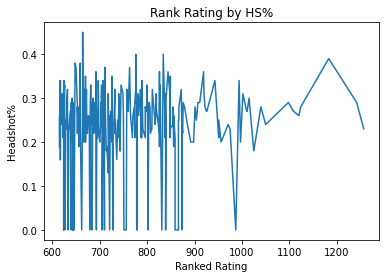

In [82]:
plt.plot(df['rating'],df['headshot %'])                                #set the parameters for my plot where x is the ranked rating column and y is headshotpercentage in decimals
plt.xlabel('Ranked Rating')                                               #I used the function to add the x label ranked rating
plt.ylabel('Headshot%')                                         #I used the function to add the y label hs
plt.title("Rank Rating by HS%")                                  #use the function to add a title 
path ='/Users/owenl/Documents/GitHub/RL/'  #define the location of where we want to save the image in
plt.savefig(path+'rankratingbyhs.png', dpi = 800)   #save the graph as an png with dots per inch the resolution being 800
plt.show()                                                        # Use the plt.show function to display my graph

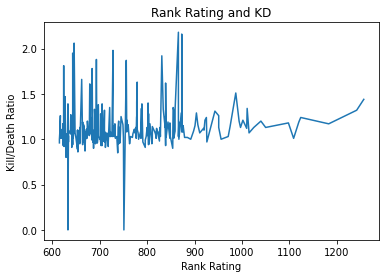

In [83]:
plt.plot(df['rating'],df['killToDeath ratio'])                                #set the parameters for my plot where x is the rank column and y is rating column
plt.xlabel('Rank Rating')                                               #I used the function to add the x label rank rating
plt.ylabel('Kill/Death Ratio')                                         #I used the function to add the y label Kill/Death Ratio
plt.title("Rank Rating and KD")                                  #use the function to add a title 
path ='/Users/owenl/Documents/GitHub/RL/'  #define the location of where we want to save the image in
plt.savefig(path+'rankratingbykd.png', dpi = 800)   #save the graph as an png with dots per inch the resolution being 800
plt.show()                                                        # Use the plt.show function to display my graph

# ScatterPlots showcasing relationship between different individual stats 

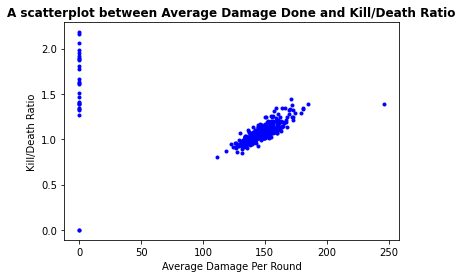

In [84]:
plt.plot('Damaged/rounds','killToDeath ratio', data=df, linestyle='none', marker='.', color = 'b')      #use the command to plot out a scatter graph where the data is taken from the data function defined above and set the color of the dots to blue.
plt.xlabel('Average Damage Per Round')                                               #print the y label as Average Damage Per Round
plt.ylabel('Kill/Death Ratio')                                          #print the y label as the Kill/Death Ratio
plt.title("A scatterplot between Average Damage Done and Kill/Death Ratio",fontweight='bold')  #print the title and make the front bold 
path ='/Users/owenl/Documents/GitHub/RL/'  #define the location of where we want to save the image in
plt.savefig(path+'scatterkdadr.png', dpi = 800)   #save the graph as an png with dots per inch the resolution being 800
plt.show()        #show the scatter plot 

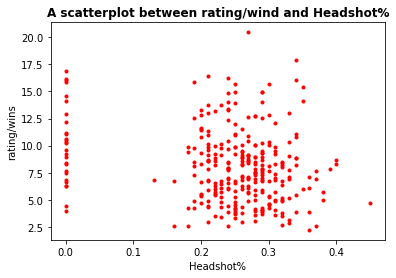

In [85]:
plt.plot('headshot %','rating/wins', data=df, linestyle='none', marker='.', color = 'r')      #use the command to plot out a scatter graph where the data is taken from the data function defined above and set the color of the dots to blue.
plt.xlabel('Headshot%')                                               #print the y label as Headshot%
plt.ylabel('rating/wins')                                          #print the y label as the rating/wins
plt.title("A scatterplot between rating/wind and Headshot%",fontweight='bold')  #print the title and make the front bold 
path ='/Users/owenl/Documents/GitHub/RL/'  #define the location of where we want to save the image in
plt.savefig(path+'scatterhsrating.png', dpi = 800)   #save the graph as an png with dots per inch the resolution being 800
plt.show()        #show the scatter plot 

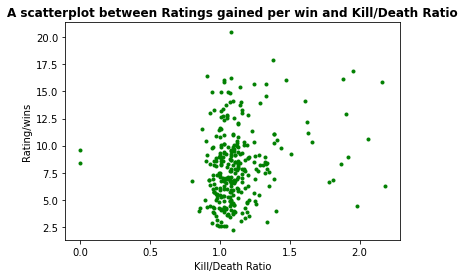

In [86]:
plt.plot('killToDeath ratio','rating/wins', data=df, linestyle='none', marker='.', color = 'g')      #use the command to plot out a scatter graph where the data is taken from the data function defined above and set the color of the dots to green.
plt.xlabel('Kill/Death Ratio')                                               #print the y label as Kill/Death Ratio
plt.ylabel('Rating/wins')                                          #print the y label as the Ratingperwin
plt.title("A scatterplot between Ratings gained per win and Kill/Death Ratio",fontweight='bold')  #print the title and make the front bold 
path ='/Users/owenl/Documents/GitHub/RL/'  #define the location of where we want to save the image in
plt.savefig(path+'scatterkdratingwin.png', dpi = 800)   #save the graph as an png with dots per inch the resolution being 800
plt.show()        #show the scatter plot 

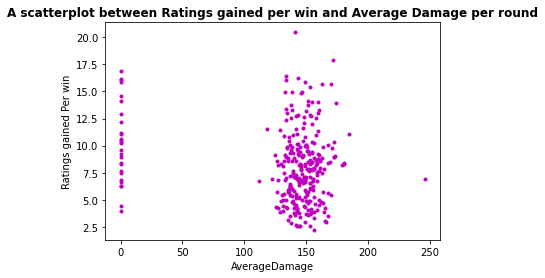

In [87]:
plt.plot('Damaged/rounds','rating/wins', data=df, linestyle='none', marker='.', color = 'm')      #use the command to plot out a scatter graph where the data is taken from the data function defined above and set the color of the dots to blue.
plt.xlabel('AverageDamage')                                               #print the y label as AverageDamage
plt.ylabel('Ratings gained Per win')                                          #print the y label as the Ratingperwin
plt.title("A scatterplot between Ratings gained per win and Average Damage per round",fontweight='bold')  #print the title and make the front bold 
path ='/Users/owenl/Documents/GitHub/RL/'  #define the location of where we want to save the image in
plt.savefig(path+'scatterratinggainadr.png', dpi = 800)   #save the graph as an png with dots per inch the resolution being 800
plt.show()        #show the scatter plot 

# What I realized after making the different graphs:  

## It is clear, especially when looking at the linegraphs on individual statistics and ranked rating, that there isn't really a correlation between the best player, wardell, vs the "worst" player in the ladder since each player may play a different way, have a different playstyle that corresponds to their personality, etc. Many top players have negative KD, more death than kills, yet they are ahead of the pack on the ranked ladder. This means that individual stats have no bearing in terms of winning on a team and other factors such as the mood or environment matters more.

### For coefficient and interpretation, please look through the R notebook.  